### Same models for shrinking balanced dataset

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# suppress warning 
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#load dataset
alldata = pd.read_csv('created_datasets/alldata.csv')

In [4]:
len(alldata)

4331

In [5]:
df1 = alldata[alldata['categories'] == '2~3']
df2 = alldata[alldata['categories'] == '3~4']
df3 = alldata[alldata['categories'] == '4~5']

In [6]:
df4 = df1.sample(frac = 0.452) #400
df5 = df2.sample(frac = 0.2355) #400
df6 = df3.sample(frac = 0.3) #400
df7 = alldata[alldata['categories'] == '1~2'] 
df7 = df7.sample(frac = 0.963) #400

In [7]:
alldata = np.concatenate((df4, df5, df6, df7), axis=0)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [9]:
alldata = pd.DataFrame(alldata)
alldata.columns = ['name','latitude','longitude','review_count','stars_y',
                   'useful','funny','cool','text','review','clean_text',
                   'clean_text_tag','categories']

In [10]:
alldata.head()

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text,review,clean_text,clean_text_tag,categories
0,Sunridge World Health,51.074824,-113.985682,9.000000,2.555556,28,6,7,"[""I worked with Brandon for a few months , he'...","I worked with Brandon for a few months , he's ...",worked brandon months he good customizing bala...,worked brandon months he good customizing bala...,2~3
1,Southland Registrations,50.967691,-114.075599,15.000000,2.625000,75,14,3,"[""Yikes! There are some interesting and entert...",Yikes! There are some interesting and entertai...,yikes interesting entertaining reviews lol rea...,yikes interesting entertaining reviews lol rea...,2~3
2,A.R.Wright Plumbing & Heating,51.013250,-114.062108,3.000000,2.333333,4,0,0,['Pretty bad. My faucet was leaking and after ...,Pretty bad. My faucet was leaking and after 4 ...,pretty bad faucet leaking plumbers still leaki...,pretty bad faucet leaking plumbers still leaki...,2~3
3,Toys R Us,51.136042,-114.033471,5.625000,2.812500,9,6,3,"[""You want Nerf guns? This is the place. Of co...",You want Nerf guns? This is the place. Of cour...,want nerf guns place course got much more put ...,want nerf guns place course got much more put ...,2~3
4,Boardwalk Fresh Burgers and Fries,51.025812,-114.104547,35.569231,2.600000,91,14,9,"[""Coupon brought us in, good food and atmosphe...","Coupon brought us in, good food and atmosphere...",coupon brought us in good food atmosphere us r...,coupon brought us in good food atmosphere us r...,2~3


In [11]:
len(alldata)

1600

In [12]:
model_data = []
for i in range(len(alldata)):
    text = list(alldata.iloc[i][['clean_text']])[0]
    star = alldata.iloc[i][['categories']]
    model_data.append([text, star])

X = []
y = []

for features,label in model_data:
    X.append(features)
    y.append(label)

In [13]:
model_data = []
for i in range(len(alldata)):
    text = list(alldata.iloc[i][['clean_text_tag']])[0]
    star = alldata.iloc[i][['categories']]
    model_data.append([text, star])

X_tag = []
y_tag = []

for features,label in model_data:
    X_tag.append(features)
    y_tag.append(label)

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tf_vectorizer = CountVectorizer(max_df=max_df, 
                                        min_df=2, 
                                        max_features=no_feature, 
                                        stop_words='english',
                                        lowercase=True)
        tf_vectorizer.fit_transform(X)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
        x_train_vectors = tf_vectorizer.transform(x_train)
        x_test_vectors = tf_vectorizer.transform(x_test)    

        ### this fit the Naive Bayes Classifier
        clf = MultinomialNB()
        clf.fit(x_train_vectors, y_train)

        # this uses the Naive Bayes Classifier to predict
        y_pred1 = clf.predict(x_test_vectors)
        # this prints the f1_score 
        print (f"F1 SCORE for prediction 5:{f1_score(y_test, y_pred1, average='macro')}")
        print (f"Accuracy for prediction 5:{accuracy_score(y_test, y_pred1)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 5:0.4766202316631253
Accuracy for prediction 5:0.503125
400-no_feature-0.85-max_df
F1 SCORE for prediction 5:0.47713287691261264
Accuracy for prediction 5:0.503125
400-no_feature-0.95-max_df
F1 SCORE for prediction 5:0.47713287691261264
Accuracy for prediction 5:0.503125
500-no_feature-0.75-max_df
F1 SCORE for prediction 5:0.4658664714165489
Accuracy for prediction 5:0.49375
500-no_feature-0.85-max_df
F1 SCORE for prediction 5:0.4634568113159495
Accuracy for prediction 5:0.490625
500-no_feature-0.95-max_df
F1 SCORE for prediction 5:0.4634568113159495
Accuracy for prediction 5:0.490625


In [16]:
no_features = 500
#turns text data into feature vectors
tf_vectorizer = CountVectorizer(max_df=0.85, 
                                min_df=2, 
                                max_features=no_features, 
                                stop_words='english',
                                lowercase=True)
tf_vectorizer.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
x_train_vectors = tf_vectorizer.transform(x_train)
x_test_vectors = tf_vectorizer.transform(x_test)
### this fit the Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(x_train_vectors, y_train)

# this uses the Naive Bayes Classifier to predict
y_pred1 = clf.predict(x_test_vectors)
# this prints the f1_score 
print (f"F1 SCORE for prediction 5:{f1_score(y_test, y_pred1, average='macro')}")
print (f"Accuracy for prediction 5:{accuracy_score(y_test, y_pred1)}")

F1 SCORE for prediction 5:0.4634568113159495
Accuracy for prediction 5:0.490625


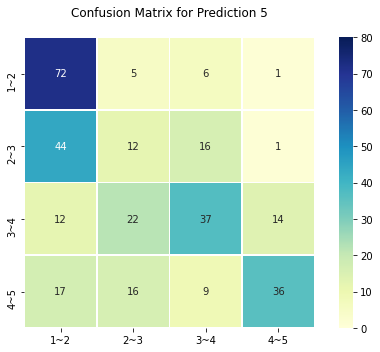

In [17]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred1),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=80,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 5' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 5',dpi=300)
plt.show()

In [18]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tfid_vectorizer = TfidfVectorizer(max_df=max_df, 
                                        min_df=2, 
                                        max_features=no_feature, 
                                        stop_words='english',
                                        lowercase=True)
        tf_vectorizer.fit_transform(X)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
        tfid_vectorizer.fit_transform(X)
        x_train_vectors = tfid_vectorizer.transform(x_train)
        x_test_vectors = tfid_vectorizer.transform(x_test)  

        ### this fit the Naive Bayes Classifier
        clf = MultinomialNB()
        clf.fit(x_train_vectors, y_train)

        # this uses the Naive Bayes Classifier to predict
        y_pred2 = clf.predict(x_test_vectors)
        # this prints the f1_score 
        print (f"F1 SCORE for prediction 6:{f1_score(y_test, y_pred2, average='macro')}")
        print (f"Accuracy for prediction 6:{accuracy_score(y_test, y_pred2)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 6:0.5084470845972363
Accuracy for prediction 6:0.534375
400-no_feature-0.85-max_df
F1 SCORE for prediction 6:0.5137341485507246
Accuracy for prediction 6:0.5375
400-no_feature-0.95-max_df
F1 SCORE for prediction 6:0.5137341485507246
Accuracy for prediction 6:0.5375
500-no_feature-0.75-max_df
F1 SCORE for prediction 6:0.5012406785441534
Accuracy for prediction 6:0.53125
500-no_feature-0.85-max_df
F1 SCORE for prediction 6:0.4951212227935964
Accuracy for prediction 6:0.525
500-no_feature-0.95-max_df
F1 SCORE for prediction 6:0.4951212227935964
Accuracy for prediction 6:0.525


In [19]:
no_features = 500
#turns text data into feature vectors
tfid_vectorizer = TfidfVectorizer(max_df=0.85, 
                                  min_df=2, 
                                  max_features=no_features, 
                                  stop_words='english',
                                  lowercase=True)
tfid_vectorizer.fit_transform(X)
x_train_vectors = tfid_vectorizer.transform(x_train)
x_test_vectors = tfid_vectorizer.transform(x_test)

clf = MultinomialNB()
clf.fit(x_train_vectors, y_train)

# this uses the Naive Bayes Classifier to predict
y_pred2 = clf.predict(x_test_vectors)

# this prints the f1_score 
print (f"F1 SCORE for prediction 6:{f1_score(y_test, y_pred2, average='macro')}")
print (f"Accuracy for prediction 6:{accuracy_score(y_test, y_pred2)}")

F1 SCORE for prediction 6:0.4951212227935964
Accuracy for prediction 6:0.525


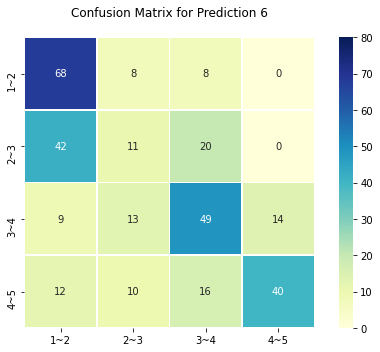

In [20]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred2),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=80,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 6' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 6',dpi=300)
plt.show()

In [21]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tf_vectorizer = CountVectorizer(max_df=max_df, 
                                        min_df=2, 
                                        max_features=no_feature, 
                                        stop_words='english',
                                        lowercase=True)
        tf_vectorizer.fit_transform(X_tag)
        x_train2, x_test2, y_train2, y_test2 = train_test_split(X_tag, y_tag, test_size = 0.20, random_state = 1)
        x_train_vectors2 = tf_vectorizer.transform(x_train2)
        x_test_vectors2 = tf_vectorizer.transform(x_test2)


        ### this fit the Naive Bayes Classifier
        clf = MultinomialNB()
        clf.fit(x_train_vectors2, y_train2)

        # this uses the Naive Bayes Classifier to predict
        y_pred3 = clf.predict(x_test_vectors2)

        # this prints the f1_score 
        print (f"F1 SCORE for prediction 7:{f1_score(y_test2, y_pred3, average='macro')}")
        print (f"Accuracy for prediction 7:{accuracy_score(y_test2, y_pred3)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 7:0.4730428914406237
Accuracy for prediction 7:0.5
400-no_feature-0.85-max_df
F1 SCORE for prediction 7:0.48002809638847727
Accuracy for prediction 7:0.50625
400-no_feature-0.95-max_df
F1 SCORE for prediction 7:0.47941545039068256
Accuracy for prediction 7:0.50625
500-no_feature-0.75-max_df
F1 SCORE for prediction 7:0.4597834902804649
Accuracy for prediction 7:0.4875
500-no_feature-0.85-max_df
F1 SCORE for prediction 7:0.46731787184663565
Accuracy for prediction 7:0.49375
500-no_feature-0.95-max_df
F1 SCORE for prediction 7:0.47382427695701046
Accuracy for prediction 7:0.5


In [22]:
no_features = 500
#turns text data into feature vectors
tf_vectorizer = CountVectorizer(max_df=0.85, 
                                min_df=2, 
                                max_features=no_features, 
                                stop_words='english',
                                lowercase=True)
tf_vectorizer.fit_transform(X_tag)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_tag, y_tag, test_size = 0.20, random_state = 1)
x_train_vectors2 = tf_vectorizer.transform(x_train2)
x_test_vectors2 = tf_vectorizer.transform(x_test2)


### this fit the Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(x_train_vectors2, y_train2)

# this uses the Naive Bayes Classifier to predict
y_pred3 = clf.predict(x_test_vectors2)

# this prints the f1_score 
print (f"F1 SCORE for prediction 7:{f1_score(y_test2, y_pred3, average='macro')}")
print (f"Accuracy for prediction 7:{accuracy_score(y_test2, y_pred3)}")

F1 SCORE for prediction 7:0.46731787184663565
Accuracy for prediction 7:0.49375


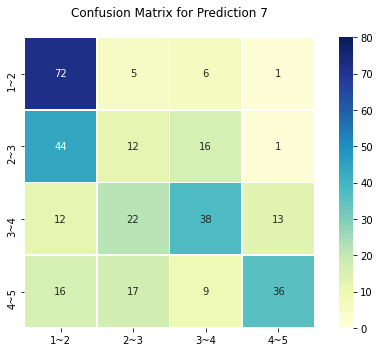

In [23]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test2, y_pred3),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=80,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 7' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 7',dpi=300)
plt.show()

In [24]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tfid_vectorizer = TfidfVectorizer(max_df=max_df, 
                                          min_df=2, 
                                          max_features=no_feature, 
                                          stop_words='english',
                                          lowercase=True)
        tfid_vectorizer.fit_transform(X_tag)
        x_train_vectors2 = tfid_vectorizer.transform(x_train2)
        x_test_vectors2 = tfid_vectorizer.transform(x_test2)

        clf = MultinomialNB()
        clf.fit(x_train_vectors2, y_train2)

        # this uses the Naive Bayes Classifier to predict
        y_pred4 = clf.predict(x_test_vectors2)

        # this prints the f1_score 
        print (f"F1 SCORE for prediction 8:{f1_score(y_test2, y_pred4, average='macro')}")
        print (f"Accuracy for prediction 8:{accuracy_score(y_test2, y_pred4)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 8:0.507606809426767
Accuracy for prediction 8:0.53125
400-no_feature-0.85-max_df
F1 SCORE for prediction 8:0.5206959706959707
Accuracy for prediction 8:0.54375
400-no_feature-0.95-max_df
F1 SCORE for prediction 8:0.5138104539335369
Accuracy for prediction 8:0.5375
500-no_feature-0.75-max_df
F1 SCORE for prediction 8:0.49783620317832133
Accuracy for prediction 8:0.528125
500-no_feature-0.85-max_df
F1 SCORE for prediction 8:0.49610970726017656
Accuracy for prediction 8:0.528125
500-no_feature-0.95-max_df
F1 SCORE for prediction 8:0.5015094021229444
Accuracy for prediction 8:0.53125


In [25]:
no_features = 500
#turns text data into feature vectors
tfid_vectorizer = TfidfVectorizer(max_df=0.85, 
                                  min_df=2, 
                                  max_features=no_features, 
                                  stop_words='english',
                                  lowercase=True)
tfid_vectorizer.fit_transform(X_tag)
x_train_vectors2 = tfid_vectorizer.transform(x_train2)
x_test_vectors2 = tfid_vectorizer.transform(x_test2)

clf = MultinomialNB()
clf.fit(x_train_vectors2, y_train2)

# this uses the Naive Bayes Classifier to predict
y_pred4 = clf.predict(x_test_vectors2)

# this prints the f1_score 
print (f"F1 SCORE for prediction 8:{f1_score(y_test2, y_pred4, average='macro')}")
print (f"Accuracy for prediction 8:{accuracy_score(y_test2, y_pred4)}")

F1 SCORE for prediction 8:0.49610970726017656
Accuracy for prediction 8:0.528125


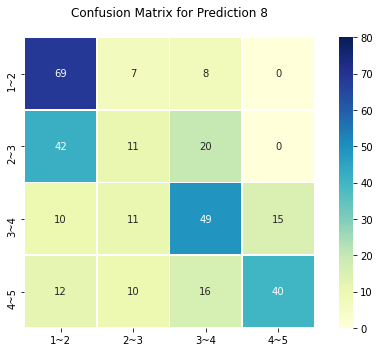

In [26]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test2, y_pred4),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=80,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 8' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 8',dpi=300)
plt.show()

In [27]:
def X_data(col):
    model_data = []
    for i in range(len(alldata)):
        text = list(alldata.iloc[i][[col]])[0]
        star = alldata.iloc[i][['categories']]
        model_data.append([text, star])

    X = []
    y = []

    for features,label in model_data:
        X.append(features)
        y.append(label)
    return X

def tf_vect(col):
    
    X = X_data(col)
    tf_vectorizer = CountVectorizer(max_df=0.85, 
                                    min_df=2, 
                                    max_features=500, 
                                    stop_words='english',
                                    lowercase=True)
    tf_vectorizer.fit_transform(X)
    
    return X
    # X
    # ["..."]

def add_geo(testdata, col, df):
    X = tf_vect(col)
    df['latitude']=np.NaN
    df['longitude']=np.NaN
    for i in range(len(alldata)):
        for j in range(len(testdata)): #867
            if X[i] == testdata[j]:
                df.loc[j, 'latitude'] = float(alldata.iloc[i][['latitude']])
                df.loc[j, 'longitude'] = float(alldata.iloc[i][['longitude']])
            else:
                pass
        else:
            pass

    return df

In [28]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred1)
df3 = pd.DataFrame(y_pred2)
df_all = np.concatenate((df1, df2, df3), axis=1)
df_all = pd.DataFrame(df_all)
df_all.columns = ['test','pred_1','pred_2']
df_all.head(n=1)

,test,pred_1,pred_2
0,2~3,1~2,1~2


In [29]:
df_all = add_geo(x_test, 'clean_text',df_all)
df_all.isnull().sum()
df_all = df_all.dropna(axis=0, how='any', thresh=None, 
                       subset=None, inplace=False)
df_all.head()

,test,pred_1,pred_2,latitude,longitude
0,2~3,1~2,1~2,50.971882,-113.970625
1,1~2,1~2,1~2,51.050808,-114.011666
2,3~4,2~3,2~3,51.053150,-114.042327
3,1~2,1~2,1~2,51.048102,-114.078346
4,1~2,1~2,1~2,50.955091,-113.999670


In [30]:
df4 = pd.DataFrame(y_test2)
df5 = pd.DataFrame(y_pred3)
df6 = pd.DataFrame(y_pred4)
df_all_tag = np.concatenate((df4, df5, df6), axis=1)
df_all_tag = pd.DataFrame(df_all_tag)
df_all_tag.columns = ['test','pred_3','pred_4']
df_all_tag.head(n=1)

,test,pred_3,pred_4
0,2~3,1~2,1~2


In [31]:
df_all_tag = add_geo(x_test2, 'clean_text_tag', df_all_tag)
df_all_tag.isnull().sum()
df_all_tag = df_all_tag.dropna(axis=0, how='any', thresh=None, 
                               subset=None, inplace=False)

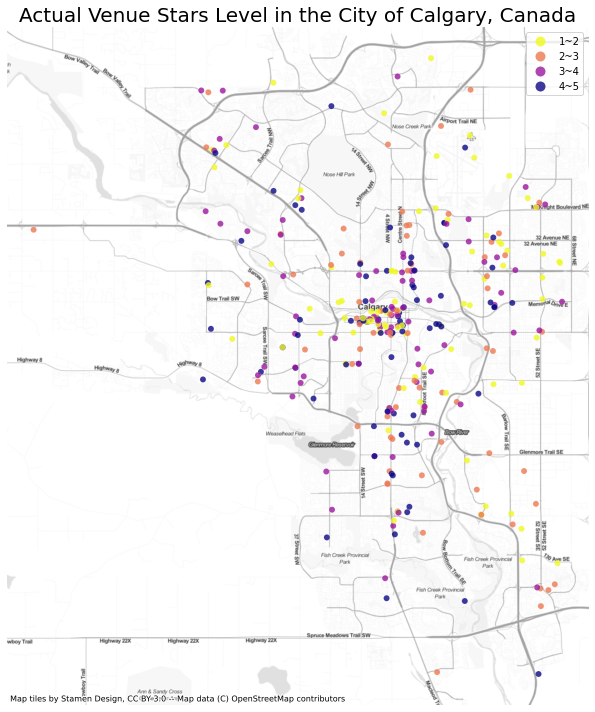

In [32]:
gdf = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.longitude, df_all.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='test', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Actual Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Actual Venue Stars Level (balanced).png", bbox_inches='tight', pad_inches=0, dpi=300)

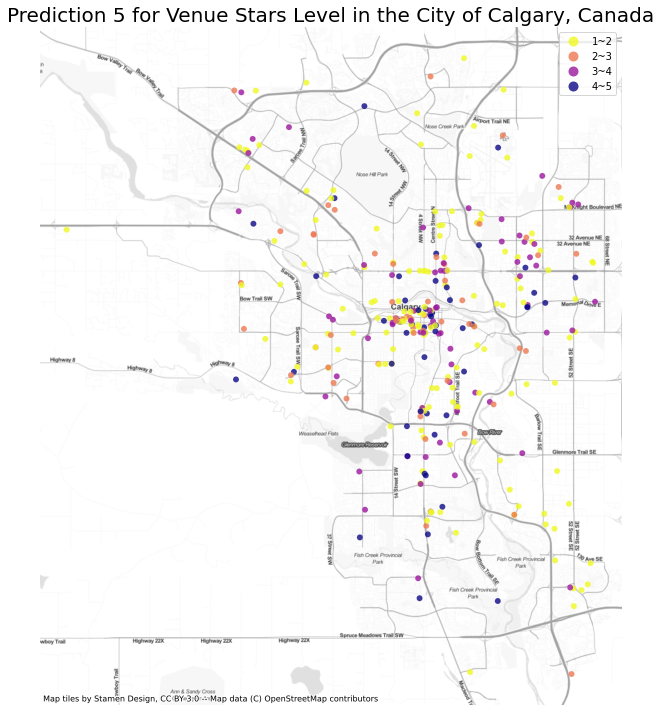

In [33]:
gdf = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.longitude, df_all.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_1', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 5 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 5 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

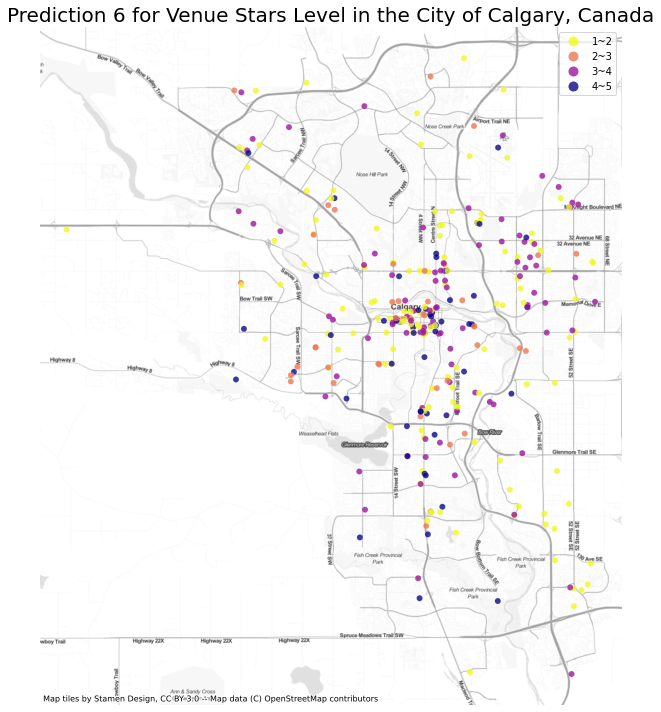

In [34]:
gdf = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.longitude, df_all.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_2', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 6 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 6 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

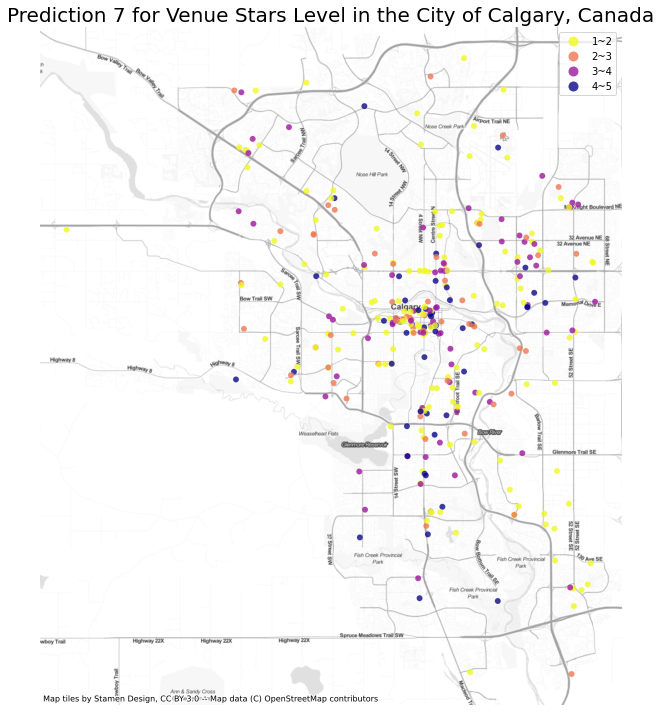

In [35]:
gdf = gpd.GeoDataFrame(df_all_tag, geometry=gpd.points_from_xy(df_all_tag.longitude, df_all_tag.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_3', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 7 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 7 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

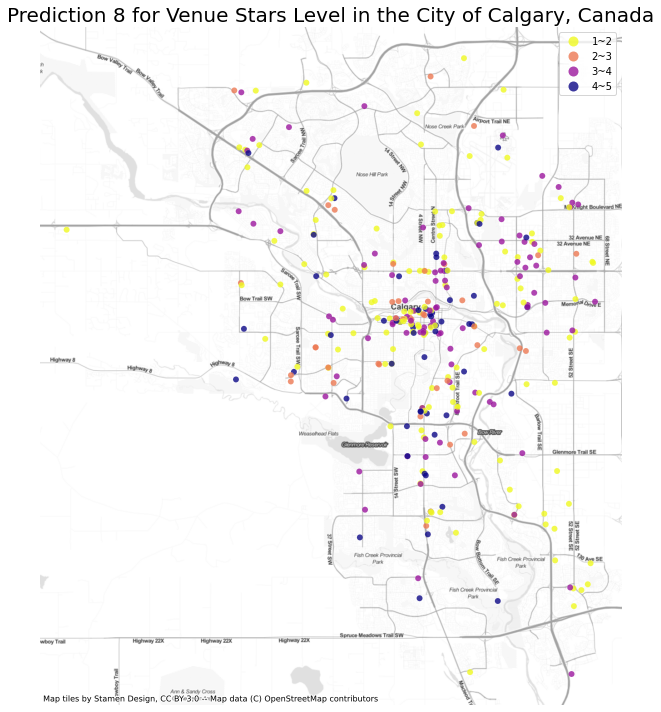

In [36]:
gdf = gpd.GeoDataFrame(df_all_tag, geometry=gpd.points_from_xy(df_all_tag.longitude, df_all_tag.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_4', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 8 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 8 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)